In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['ATR'] = ta.ATR(df['high'], df['low'], df['close'])
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X = df[['ATR']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=False,
                                                    random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1)).flatten()

# 모델 구축
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(X_scaled)

# 예측 결과 역스케일링
Y_pred_scaled = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_pred_scaled_all = scaler.inverse_transform(Y_pred_all.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_pred_scaled)

[43520484.42108904 42492949.97191247 41634739.58717791 42471926.52496794
 43800629.03165616 43533745.777564   43397291.16949825 43032415.39644993
 41914043.28348051 41327632.89429027 40761056.37603542 40168791.85277852
 40982784.34750073 43400296.83372337 43225961.23438885 42497326.732176
 42719380.40803942 45601654.34963255 46780681.03005309 50005771.27206774
 52213220.62532583 52464606.68252874 51921785.58546504 51293140.31619627
 51359949.55078889 50500188.6259996  50781313.25289743 50625563.68457486
 50421397.10474281 48758701.14496167 47842165.23794286 47814760.2474349
 46977777.61222886 45679035.80542058 45613179.93753366 45155081.52237418
 43940221.8639985  42850729.92001859 44004622.71892937 43467358.49612502
 44457019.80611994 43691173.49528471 43123372.2976959  41694177.58420137
 40651546.55950075 41110191.45708735 41878993.7083657  41682109.73464509
 40594030.26978431 40388590.13508878 40120640.246705   41136545.410779
 46085738.06460368 47046048.248427   48024872.56016106 4

In [3]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print(f"[r2_score] train : {r2_train} / test : {r2_test}")

# mse
mse = mean_squared_error(Y_test, Y_pred)
# rmse
rmse = np.sqrt(mse)

print(f'[MSE] : {mse:.3f}\n[RMSE] : {rmse:.3f}')

[r2_score] train : 0.7606644592412342 / test : -0.04465494815964144
[MSE] : 0.051
[RMSE] : 0.225


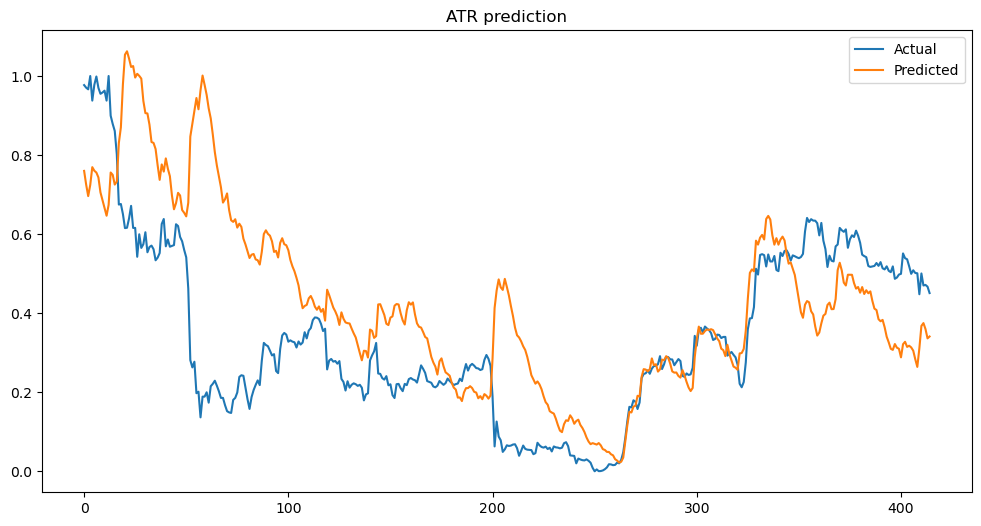

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('ATR prediction')
plt.legend()
plt.show()